In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns
import scipy.stats as stats

In [2]:
df_NHIS = pd.read_csv('./NBMQ_i10.csv')
df_NHIS

,Unnamed: 0.1,Unnamed: 0,SICK_SYM1,OPRTN_YN,BTH_YYYY,VSHSP_DD_CNT,EDC_SBA,MDCARE_DD_CNT,EDC_INSUR_BRDN_AMT
0,190,190,I10,0,1921LE,1,3000,1,4570
1,195,195,I10,0,1921LE,2,6000,2,12160
2,197,197,I10,0,1921LE,1,3000,1,4570
3,284,284,I10,0,1921LE,1,4200,1,10000
4,769,769,I10,0,1921LE,1,1500,1,5810
...,...,...,...,...,...,...,...,...,...
4624,124484,124484,I10,0,2005,1,3000,1,6050
4625,124485,124485,I10,0,2005,1,3000,1,6050
4626,124486,124486,I10,0,2005,1,3000,1,6050
4627,124495,124495,I10,0,2005,1,3000,1,6380


In [3]:
df_NHIS_list = df_NHIS.describe().columns.to_list()
df_NHIS_list

['Unnamed: 0.1',
 'Unnamed: 0',
 'OPRTN_YN',
 'VSHSP_DD_CNT',
 'EDC_SBA',
 'MDCARE_DD_CNT',
 'EDC_INSUR_BRDN_AMT']

In [4]:
df_NHIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0.1        4629 non-null   int64 
 1   Unnamed: 0          4629 non-null   int64 
 2   SICK_SYM1           4629 non-null   object
 3   OPRTN_YN            4629 non-null   int64 
 4   BTH_YYYY            4629 non-null   object
 5   VSHSP_DD_CNT        4629 non-null   int64 
 6   EDC_SBA             4629 non-null   int64 
 7   MDCARE_DD_CNT       4629 non-null   int64 
 8   EDC_INSUR_BRDN_AMT  4629 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 325.6+ KB


### 단일 변수에 대한 정규성 여부 판단
- 검증 개수에 따른 방법 선택
    - 5천개 이하: shapiro normality test
    - 5천개 이상: Anderson normality test

### X: 연속형 / Y: 연속형: 주로 상관관계 확인
- correlation coefficient(상관계수)
    - -1 ~ 1
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수록 정비례

### 변수 설명
- SICK_SYM1 (질병 증상)
- OPRTN_YN (수술 여부) : pvalue=1.1662903985210721e-39
- BTH_YYYY (생년월일)
- VSHSP_DD_CNT (전문의 방문 횟수)
- EDC_SBA (전자 데이터 캡처 소상공인청)
- MDCARE_DD_CNT (메디케어 공제 횟수) : pvalue=1.7574341125238046e-62
- EDC_INSUR_BRDN_AMT (EDC 보험 부담 금액)

#### 분석 스토리
수술 여부와 메디케어 공제 횟수에 따라 보험 부담 금액이 달라지는것으로 보인다

### 선정 변수 : EDC_INSUR_BRDN_AMT
- 분석 내용 : EDC 보험 부담 금액은 정규 분포를 따르는가?
    - 귀무 가설 : EDC 보험 부담 금액은 정규 분포이다.
    - 대립 가설 : EDC 보험 부담 금액은 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 81.5 > 0.78(p-value 0.05)이므로 귀무 가설이 참
    - 사실 결론 : EDC 보험 부담 금액은 정규 분포이다.

In [5]:
df_EDC_INSUR_BRDN_AMT = df_NHIS['EDC_INSUR_BRDN_AMT']

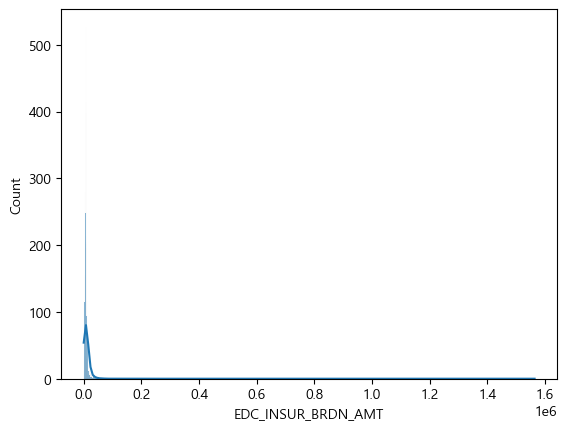

In [6]:
sns.histplot(data=df_NHIS, x='EDC_INSUR_BRDN_AMT', kde=True)
plt.show()

In [7]:
df_EDC_INSUR_BRDN_AMT = df_NHIS['EDC_INSUR_BRDN_AMT'].dropna()

In [8]:
df_EDC_INSUR_BRDN_AMT.count()

4629

5천개 이하: shapiro normality test

In [9]:
## s < cv : 정규분포, s > cv : 비정규분포 
s, cv, sl = stats.anderson(df_EDC_INSUR_BRDN_AMT)
s, cv, sl 

##  s > cv 대립가설 참
##  s < cv 귀무가설  참

(1335.2043896168316,
 array([0.576, 0.655, 0.786, 0.917, 1.091]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수: OPRTN_YN -> EDC_INSUR_BRDN_AMT
- 분석 내용: 수술 여부에 따라서 보험 부담 금액 변화가 있는가?
    - 귀무 가설: 수술 여부에 따라서 보험 부담 금액 변화가 없다.
    - 대립 가설: 수술 여부에 따라서 보험 부담 금액 변화가 있다.
- 분석 결론 (기준: p-value 0.05)
    - 통계 결론: 대립가설 참
    - 사실 결론: 수술 여부에 따라서 보험 부담 금액 올라간다.

In [10]:
df_OPRTN_YN = df_NHIS[['OPRTN_YN','EDC_INSUR_BRDN_AMT']]
df_OPRTN_YN

,OPRTN_YN,EDC_INSUR_BRDN_AMT
0,0,4570
1,0,12160
2,0,4570
3,0,10000
4,0,5810
...,...,...
4624,0,6050
4625,0,6050
4626,0,6050
4627,0,6380


In [11]:
df_OPRTN_YN.isnull().sum()

OPRTN_YN              0
EDC_INSUR_BRDN_AMT    0
dtype: int64

In [12]:
df_OPRTN_YN = df_OPRTN_YN.dropna().copy()

In [13]:
stats.pearsonr(df_OPRTN_YN['OPRTN_YN'], df_OPRTN_YN['EDC_INSUR_BRDN_AMT'])

PearsonRResult(statistic=0.19194547999546901, pvalue=1.1662903985210721e-39)

#### 선정 변수: VSHSP_DD_CNT -> EDC_INSUR_BRDN_AMT
- 분석 내용: 전문의 방문 횟수에 따라서 보험 부담 금액 변화가 있는가?
    - 귀무 가설: 전문의 방문 횟수에 따라서 보험 부담 금액 변화가 없다.
    - 대립 가설: 전문의 방문 횟수에 따라서 보험 부담 금액 변화가 있다.
- 분석 결론 (기준: p-value 0.05)
    - 통계 결론: 대립가설 참
    - 사실 결론: 전문의 방문 횟수에 따라서 보험 부담 금액 올라간다.

In [14]:
df_VSHSP_DD_CNT = df_NHIS[['VSHSP_DD_CNT','EDC_INSUR_BRDN_AMT']]
df_VSHSP_DD_CNT

,VSHSP_DD_CNT,EDC_INSUR_BRDN_AMT
0,1,4570
1,2,12160
2,1,4570
3,1,10000
4,1,5810
...,...,...
4624,1,6050
4625,1,6050
4626,1,6050
4627,1,6380


In [15]:
df_VSHSP_DD_CNT.isnull().sum()

VSHSP_DD_CNT          0
EDC_INSUR_BRDN_AMT    0
dtype: int64

In [16]:
df_VSHSP_DD_CNT = df_NHIS['VSHSP_DD_CNT'].dropna()

In [17]:
s, cv, sl = stats.anderson(df_VSHSP_DD_CNT)
s, cv, sl

(1445.6397248233925,
 array([0.576, 0.655, 0.786, 0.917, 1.091]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수: MDCARE_DD_CNT -> EDC_INSUR_BRDN_AMT
- 분석 내용: 메디케어 공제 횟수에 따라서 보험 부담 금액 변화가 있는가?
    - 귀무 가설: 메디케어 공제 횟수에 따라서 보험 부담 금액 변화가 없다.
    - 대립 가설: 메디케어 공제 횟수에 따라서 보험 부담 금액 변화가 있다.
- 분석 결론 (기준: p-value 0.05)
    - 통계 결론: 대립가설 참
    - 사실 결론: 메디케어 공제 횟수에 따라서 보험 부담 금액 올라간다.

In [18]:
df_MDCARE_DD_CNT = df_NHIS[['MDCARE_DD_CNT','EDC_INSUR_BRDN_AMT']]
df_MDCARE_DD_CNT

,MDCARE_DD_CNT,EDC_INSUR_BRDN_AMT
0,1,4570
1,2,12160
2,1,4570
3,1,10000
4,1,5810
...,...,...
4624,1,6050
4625,1,6050
4626,1,6050
4627,1,6380


In [19]:
df_MDCARE_DD_CNT.isnull().sum()

MDCARE_DD_CNT         0
EDC_INSUR_BRDN_AMT    0
dtype: int64

In [20]:
df_MDCARE_DD_CNT = df_MDCARE_DD_CNT.dropna().copy()

In [21]:
stats.pearsonr(df_MDCARE_DD_CNT['MDCARE_DD_CNT'], df_MDCARE_DD_CNT['EDC_INSUR_BRDN_AMT'])

PearsonRResult(statistic=0.24162171579064923, pvalue=1.7574341125238046e-62)